<a href="https://colab.research.google.com/github/lauracantik/deep_learning/blob/main/Tugas%20Pertemuan%2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.12.0


In [15]:
# Melakukan Import Dataset

fashion_mnist = keras.datasets.fashion_mnist

load_data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = load_data

4422102/4422102 [==============================] - 0s 0us/step


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Menyiapkan data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0




In [17]:
# Membangun model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [18]:
# Mengompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [19]:
# Melatih model dengan dropout
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 21ms/step - loss: 0.3497 - accuracy: 0.8917 - val_loss: 0.1380 - val_accuracy: 0.9555
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1634 - accuracy: 0.9507 - val_loss: 0.0923 - val_accuracy: 0.9712
Epoch 3/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1266 - accuracy: 0.9609 - val_loss: 0.0792 - val_accuracy: 0.9770
Epoch 4/10
469/469 [==============================] - 12s 26ms/step - loss: 0.1083 - accuracy: 0.9670 - val_loss: 0.0726 - val_accuracy: 0.9779
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0959 - accuracy: 0.9699 - val_loss: 0.0702 - val_accuracy: 0.9788
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0848 - accuracy: 0.9720 - val_loss: 0.0648 - val_accuracy: 0.9798
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0802 - accuracy: 0.9739 - val_loss: 0.0628 - val_accuracy: 

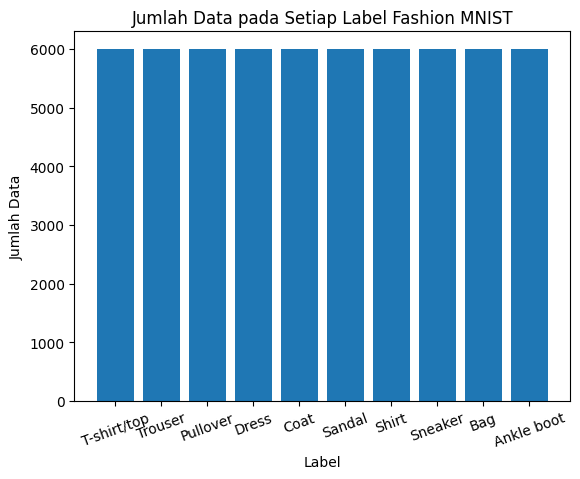

In [20]:
# Menghitung jumlah data pada setiap label
label_counts = np.bincount(train_labels)

# Menampilkan bar chart
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.bar(class_names, label_counts)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data pada Setiap Label Fashion MNIST')
plt.xticks(rotation=20)
plt.show()


In [21]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=train_images.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=test_images.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)
Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


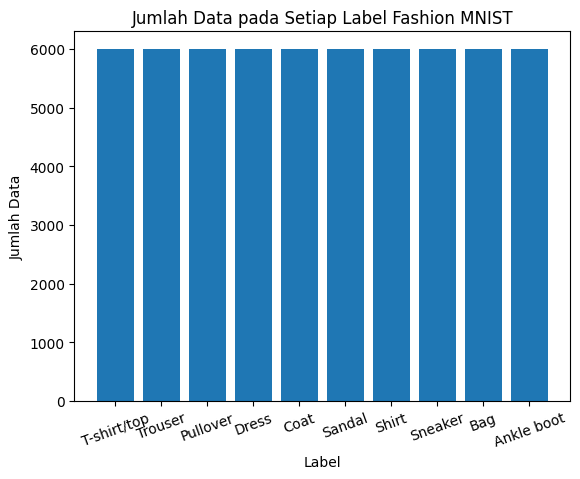

In [22]:
# Menghitung jumlah data pada setiap label
label_counts = np.bincount(train_labels)

# Menampilkan bar chart
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.bar(class_names, label_counts)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data pada Setiap Label Fashion MNIST')
plt.xticks(rotation=20)
plt.show()


In [23]:
# Mencari nilai NaN pada train_images
nan_indices = np.isnan(train_images)
nan_count = np.sum(nan_indices)
print("Jumlah nilai NaN pada train_images:", nan_count)

# Mencari nilai NaN pada test_images
nan_indices = np.isnan(test_images)
nan_count = np.sum(nan_indices)
print("Jumlah nilai NaN pada test_images:", nan_count)

Jumlah nilai NaN pada train_images: 0
Jumlah nilai NaN pada test_images: 0


In [24]:
# Memeriksa tipe data pada train_labels
label_types = np.unique(train_labels)
print("Tipe data pada train_labels:", label_types)

# Memeriksa tipe data pada test_labels
label_types = np.unique(test_labels)
print("Tipe data pada test_labels:", label_types)

Tipe data pada train_labels: [0 1 2 3 4 5 6 7 8 9]
Tipe data pada test_labels: [0 1 2 3 4 5 6 7 8 9]


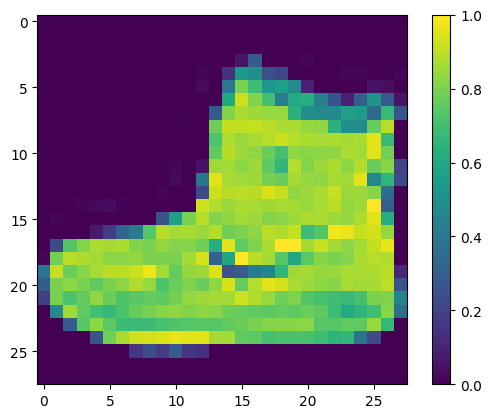

In [27]:
# Menampilkan gambar array pertama
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
# Nilai pixel diubah menjadi rentang 0 sampai dengan 1 dengan dibagi 255

train_images = train_images / 255.0
test_images = test_images / 255.0

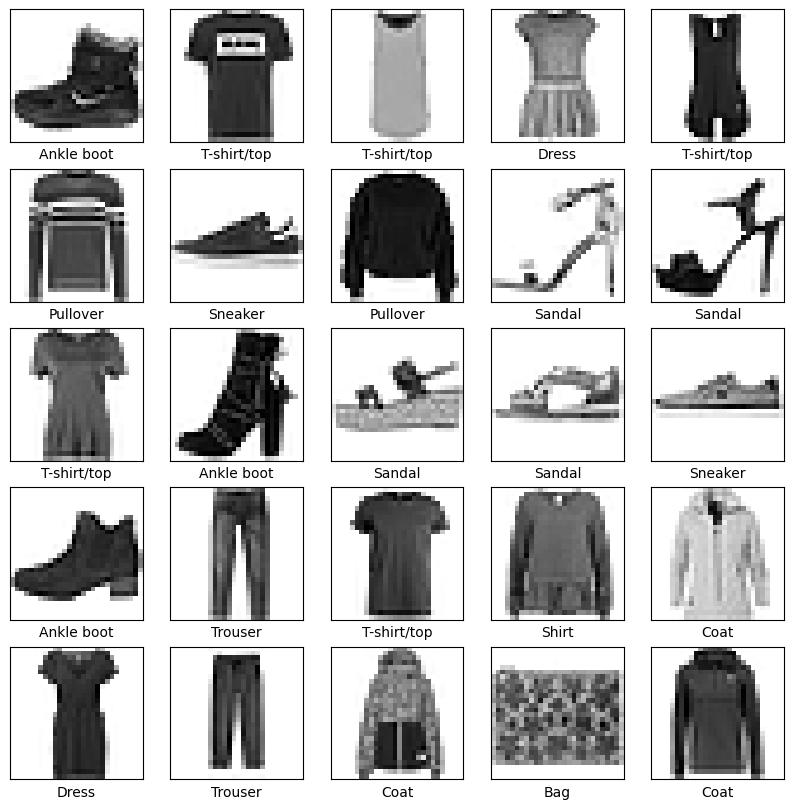

In [29]:
# Menampilkan 25 gambar pertama dari training set

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
# melakukan transformasi dari format gambar array dua dimensi (28 x 28) menjadi aray satu dimensi.
# Setelah pixel diubah menjadi satu baris, model yang akan dibuat terdiri dari dua buah layer tf.keras.layers.Dense.
# Kedua layer ini terhubung secara penuh. Layer Dense yang pertama memiliki 128 node (atau neuron).

from keras.layers import Dropout
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    Dropout (0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.2552 - accuracy: 0.5832
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.7929 - accuracy: 0.7159
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6948 - accuracy: 0.7499
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6382 - accuracy: 0.7692
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6032 - accuracy: 0.7820
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5762 - accuracy: 0.7946
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5551 - accuracy: 0.8032
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5378 - accuracy: 0.8105
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5234 - accuracy: 0.8155
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# Prediksi kelas menggunakan model
predictions_evaluasi = model.predict(test_images)
predicted_classes_evaluasi = np.argmax(predictions_evaluasi, axis=1)

# Membuat confusion matrix
confusion_mtx = confusion_matrix(test_labels, predicted_classes_evaluasi)

# Menghitung precision, recall, dan F1-score
report_eval = classification_report(test_labels, predicted_classes_evaluasi)


# Menampilkan hasil
print('\nClassification Report:')
print(report_eval)

313/313 - 1s - loss: 0.4754 - accuracy: 0.8270 - 821ms/epoch - 3ms/step
313/313 [==============================] - 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.73      0.71      0.72      1000
           3       0.81      0.86      0.83      1000
           4       0.69      0.79      0.73      1000
           5       0.94      0.89      0.91      1000
           6       0.62      0.44      0.52      1000
           7       0.88      0.92      0.90      1000
           8       0.92      0.96      0.94      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.82     10000
weighted avg       0.82      0.83      0.82     10000



In [35]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 2ms/step


In [36]:
# Melihat Presisi, recall, dan F1-Score
import sklearn.metrics as metrics

# Menghitung precision, recall, dan f1 score
precision = metrics.precision_score(test_labels, predictions.argmax(axis=1), average='weighted')
recall = metrics.recall_score(test_labels, predictions.argmax(axis=1), average='weighted')
f1_score = metrics.f1_score(test_labels, predictions.argmax(axis=1), average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8240172227076097
Recall: 0.827
F1 Score: 0.8232752874617579


In [37]:
# Melihat prediksi pertama label
print("prediksi [0] : ", np.argmax(predictions[0]))

# Mencocokan label pertama
print("Label [0] : ", test_labels[0])

prediksi [0] :  9
Label [0] :  9


In [38]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

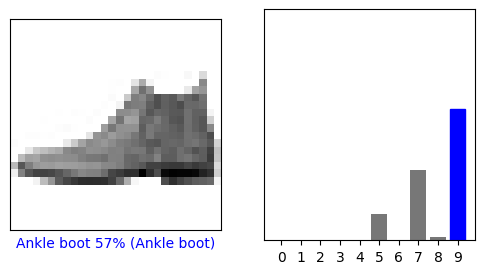

In [39]:
# Label prediksi yang tepat berwarna biru dan label prediksi yang salah akan berwarna merah

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

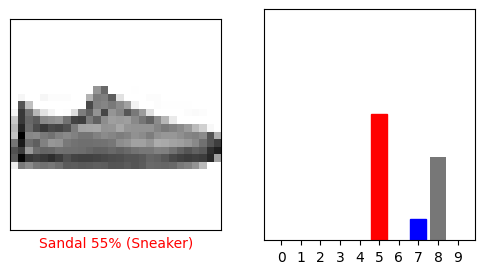

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

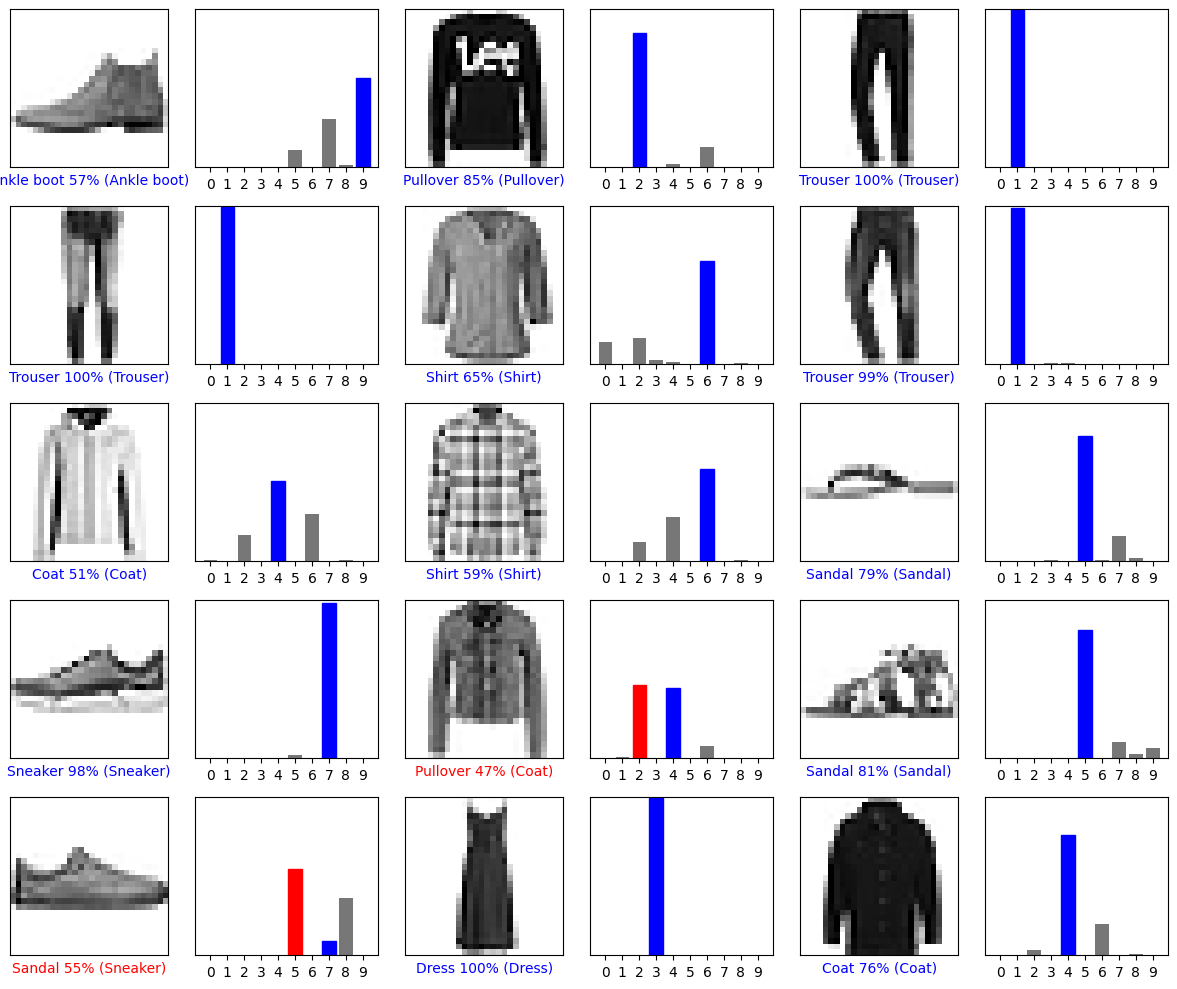

In [41]:
# Menbuat plot untuk melihat seluruh set dari prediksi 10 kelas.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
# Memprediksi Label pada Gambar
# Mengambil data test_images pertama

img = test_images[1]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[5.0614262e-04 3.1815066e-06 8.4982747e-01 3.3677468e-05 1.8824873e-02
  5.6002782e-11 1.3075672e-01 9.3681956e-17 4.7814279e-05 4.8728105e-12]]


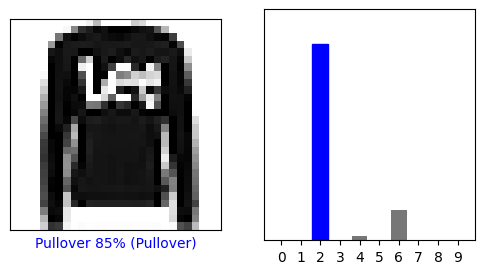

In [43]:
# Menampilkan hasil prediksi
# Gambar sudah sesuai dengan yang di prediksi yaitu pullover

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(1, predictions_single[0], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(1, predictions_single[0],  test_labels)
plt.show()